In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ess_de_org = pd.read_csv("ESS_R8_Germany.csv")

In [3]:
ess_de = ess_de_org.copy()

PRE-PROCESSING

1 - uempla

DOING LAST 7 DAYS: UNEMPLOYED, ACTIVELY LOOKING FOR JOB

0    2775
1      77
Name: uempla, dtype: int64


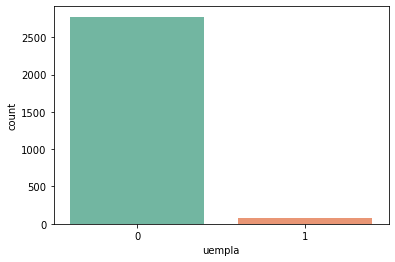

In [6]:
print(ess_de['uempla'].value_counts())
sns.countplot(x='uempla', data=ess_de, palette='Set2')
plt.show()

2 - uempli

DOING LAST 7 DAYS: UNEMPLOYED, NOT ACTIVELY LOOKING FOR JOB

0    2810
1      42
Name: uempli, dtype: int64


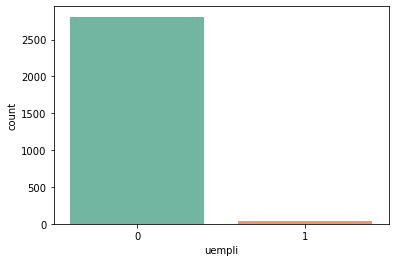

In [7]:
print(ess_de['uempli'].value_counts())
sns.countplot(x='uempli', data=ess_de, palette='Set2')
plt.show()

3 - dsbld

DOING LAST 7 DAYS: PERMANENTLY SICK OR DISABLED

0    2733
1     119
Name: dsbld, dtype: int64


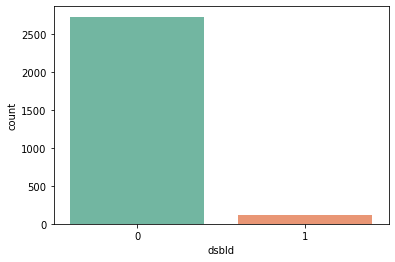

In [8]:
print(ess_de["dsbld"].value_counts())
sns.countplot(x="dsbld", data=ess_de, palette="Set2")
plt.show()

4 - rtrd

DOING LAST 7 DAYS: RETIRED

0    2127
1     725
Name: rtrd, dtype: int64


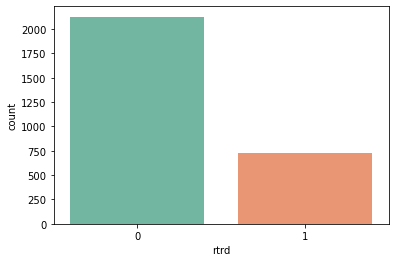

In [9]:
print(ess_de["rtrd"].value_counts())
sns.countplot(x="rtrd", data=ess_de, palette="Set2")
plt.show()

5 - uemp3m

EVER UNEMPLOYED AND SEEKING WORK FOR A PERIOD MORE THAN THREE MONTHS

2    2022
1     819
7       7
8       4
Name: uemp3m, dtype: int64


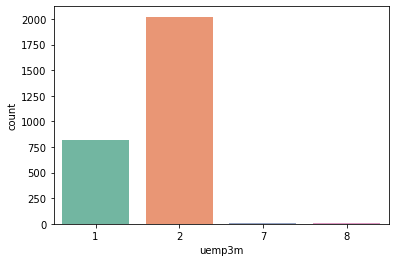

In [10]:
print(ess_de["uemp3m"].value_counts())
sns.countplot(x="uemp3m", data=ess_de, palette="Set2")
plt.show()

In [11]:
ess_de['uemp3m'] = ess_de['uemp3m'].replace([2, 7, 8], 0)

0    2033
1     819
Name: uemp3m, dtype: int64


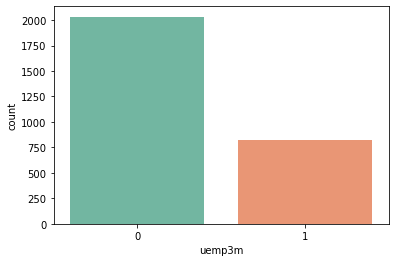

In [12]:
print(ess_de["uemp3m"].value_counts())
sns.countplot(x="uemp3m", data=ess_de, palette="Set2")
plt.show()

In [13]:
econ_var = ess_de[['uemp3m', 'rtrd', 'dsbld', 'uempli', 'uempla']].copy()

In [102]:
econ_var.describe()

,uemp3m,rtrd,dsbld,uempli,uempla,lkuemp,uentrjb,lbenent,bennent,uemplap,dsbldp,rtrdp,stfeco,emplrel,hincsrca
count,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000
mean,0.287167,0.254208,0.041725,0.014727,0.026999,0.220547,0.553647,0.691445,0.719495,0.008766,0.018233,0.162693,0.803647,1.386045,2.142356
std,0.452519,0.435491,0.199995,0.120477,0.162108,0.414688,0.497201,0.461978,0.449325,0.093231,0.133816,0.369150,0.397309,1.120575,1.652587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,8.000000


6 - lkuemp

HOW LIKELY UNEMPLOYED AND LOOKING FOR WORK NEXT 12 MONTHS

1     1387
2      678
55     493
3      149
4      118
88      21
77       6
Name: lkuemp, dtype: int64


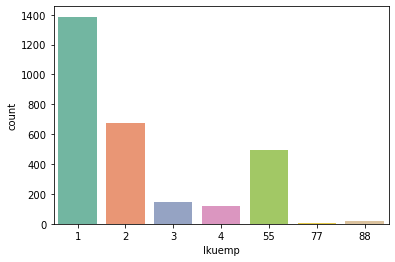

In [15]:
print(ess_de["lkuemp"].value_counts())
sns.countplot(x="lkuemp", data=ess_de, palette="Set2")
plt.show()

In [16]:
ess_de['lkuemp'] = ess_de['lkuemp'].replace([1, 2], 0)
ess_de['lkuemp'] = ess_de['lkuemp'].replace([3, 4], 1)
ess_de['lkuemp'] = ess_de['lkuemp'].replace([77, 88], 5)

0    2223
1     629
Name: lkuemp, dtype: int64


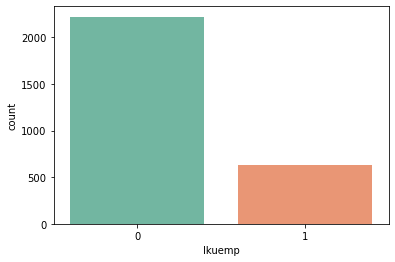

In [28]:
print(ess_de["lkuemp"].value_counts())
sns.countplot(x="lkuemp", data=ess_de, palette="Set2")
plt.show()

In [18]:
ess_de['lkuemp'] = ess_de['lkuemp'].replace([5], 55)

In [27]:
num_fives = (ess_de['lkuemp'] == 55).sum()

# calculate the number of 5 values to replace with 0 and 1
num_replace_zero = num_fives // 2
num_replace_one = num_fives - num_replace_zero

# get the indices of the 5 values to replace
replace_indices_zero = np.random.choice(ess_de[ess_de['lkuemp'] == 55].index, num_replace_zero, replace=False)
replace_indices_one = np.random.choice(ess_de[ess_de['lkuemp'] == 55].index, num_replace_one, replace=False)

# replace the 5 values with 0 and 1
ess_de.loc[replace_indices_zero, 'lkuemp'] = 0
ess_de.loc[replace_indices_one, 'lkuemp'] = 1

In [29]:
econ_var["lkuemp"] = ess_de["lkuemp"]

7 - uentrjb

4    870
2    857
3    767
1    180
5    128
8     46
7      4
Name: uentrjb, dtype: int64


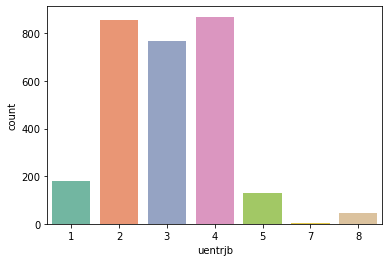

In [30]:
print(ess_de["uentrjb"].value_counts())
sns.countplot(x="uentrjb", data=ess_de, palette="Set2")
plt.show()

In [31]:
ess_de['uentrjb'] = ess_de['uentrjb'].replace([2], 1)
ess_de['uentrjb'] = ess_de['uentrjb'].replace([4,5], 0)
ess_de['uentrjb'] = ess_de['uentrjb'].replace([7,8], 3)

1    1579
0    1273
Name: uentrjb, dtype: int64


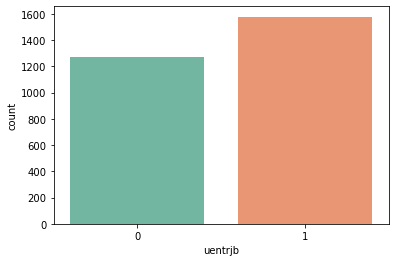

In [43]:
print(ess_de["uentrjb"].value_counts())
sns.countplot(x="uentrjb", data=ess_de, palette="Set2")
plt.show()

In [42]:
num_fives = (ess_de['uentrjb'] == 3).sum()

# calculate the number of 5 values to replace with 0 and 1
num_replace_zero = num_fives // 2
num_replace_one = num_fives - num_replace_zero

# get the indices of the 5 values to replace
replace_indices_zero = np.random.choice(ess_de[ess_de['uentrjb'] == 3].index, num_replace_zero, replace=False)
replace_indices_one = np.random.choice(ess_de[ess_de['uentrjb'] == 3].index, num_replace_one, replace=False)

# replace the 5 values with 0 and 1
ess_de.loc[replace_indices_zero, 'uentrjb'] = 0
ess_de.loc[replace_indices_one, 'uentrjb'] = 1

In [44]:
econ_var["uentrjb"] = ess_de["uentrjb"]

8 - lbenent

MANY WITH VERY LOW INCOMES GET LESS BENEFIT THAN LEGALLY ENTITLED TO

2    1065
3     829
4     458
8     297
1     157
5      44
7       2
Name: lbenent, dtype: int64


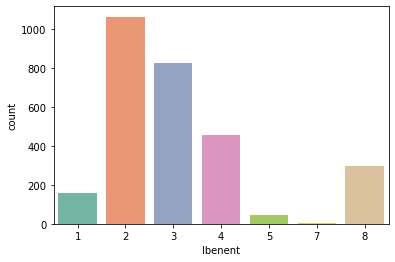

In [45]:
print(ess_de["lbenent"].value_counts())
sns.countplot(x="lbenent", data=ess_de, palette="Set2")
plt.show()

In [46]:
ess_de['lbenent'] = ess_de['lbenent'].replace([2], 1)
ess_de['lbenent'] = ess_de['lbenent'].replace([4,5], 0)
ess_de['lbenent'] = ess_de['lbenent'].replace([7,8], 3)

1    1972
0     880
Name: lbenent, dtype: int64


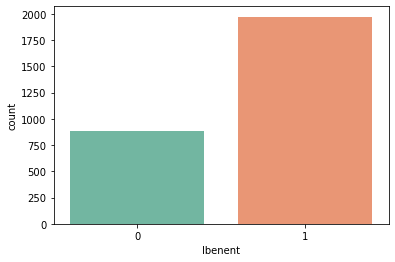

In [57]:
print(ess_de["lbenent"].value_counts())
sns.countplot(x="lbenent", data=ess_de, palette="Set2")
plt.show()

In [56]:
num_fives = (ess_de['lbenent'] == 3).sum()

# calculate the number of 5 values to replace with 0 and 1
num_replace_zero = num_fives // 2
num_replace_one = num_fives - num_replace_zero

# get the indices of the 5 values to replace
replace_indices_zero = np.random.choice(ess_de[ess_de['lbenent'] == 3].index, num_replace_zero, replace=False)
replace_indices_one = np.random.choice(ess_de[ess_de['lbenent'] == 3].index, num_replace_one, replace=False)

# replace the 5 values with 0 and 1
ess_de.loc[replace_indices_zero, 'lbenent'] = 0
ess_de.loc[replace_indices_one, 'lbenent'] = 1

In [58]:
econ_var["lbenent"] = ess_de["lbenent"]

9 - bennent

2    1388
3     568
4     521
1     208
8     117
5      47
7       3
Name: bennent, dtype: int64


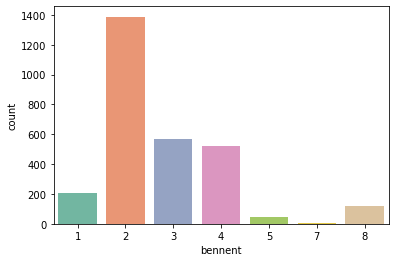

In [60]:
print(ess_de["bennent"].value_counts())
sns.countplot(x="bennent", data=ess_de, palette="Set2")
plt.show()

In [61]:
ess_de['bennent'] = ess_de['bennent'].replace([2], 1)
ess_de['bennent'] = ess_de['bennent'].replace([4,5], 0)
ess_de['bennent'] = ess_de['bennent'].replace([7,8], 3)

In [68]:
num_fives = (ess_de['bennent'] == 3).sum()

# calculate the number of 5 values to replace with 0 and 1
num_replace_zero = num_fives // 2
num_replace_one = num_fives - num_replace_zero

# get the indices of the 5 values to replace
replace_indices_zero = np.random.choice(ess_de[ess_de['bennent'] == 3].index, num_replace_zero, replace=False)
replace_indices_one = np.random.choice(ess_de[ess_de['bennent'] == 3].index, num_replace_one, replace=False)

# replace the 5 values with 0 and 1
ess_de.loc[replace_indices_zero, 'bennent'] = 0
ess_de.loc[replace_indices_one, 'bennent'] = 1

1    2052
0     800
Name: bennent, dtype: int64


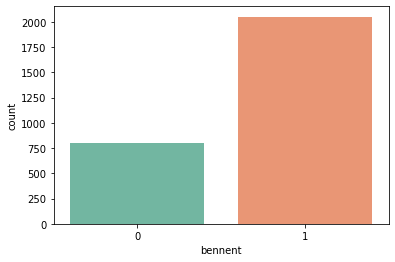

In [69]:
print(ess_de["bennent"].value_counts())
sns.countplot(x="bennent", data=ess_de, palette="Set2")
plt.show()

In [70]:
econ_var["bennent"] = ess_de["bennent"]

10 - uemplap

PARTNER DOING LAST 7 DAYS: UNEMPLOYED, ACTIVELY LOOKING FOR JOB

0    2827
1      25
Name: uemplap, dtype: int64


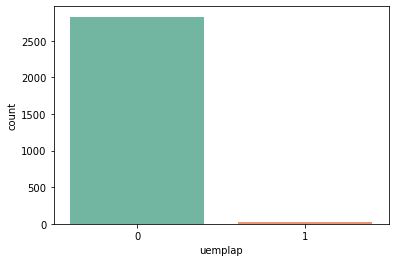

In [72]:
print(ess_de["uemplap"].value_counts())
sns.countplot(x="uemplap", data=ess_de, palette="Set2")
plt.show()

In [73]:
econ_var["uemplap"] = ess_de["uemplap"]

11 - uemplip

PARTNER DOING LAST 7 DAYS: UNEMPLOYED, NOT ACTIVELY LOOKING FOR JOB

0    2840
1      12
Name: uemplip, dtype: int64


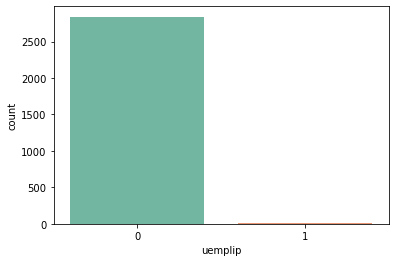

In [74]:
print(ess_de["uemplip"].value_counts())
sns.countplot(x="uemplip", data=ess_de, palette="Set2")
plt.show()

not significant/discard

12 - dsbldp

PARTNER DOING LAST 7 DAYS: PERMANENTLY SICK OR DISABLED

0    2800
1      52
Name: dsbldp, dtype: int64


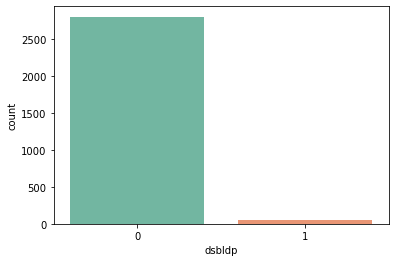

In [75]:
print(ess_de["dsbldp"].value_counts())
sns.countplot(x="dsbldp", data=ess_de, palette="Set2")
plt.show()

In [76]:
econ_var["dsbldp"] = ess_de["dsbldp"]

13 - rtrdp

PARTNER DOING LAST 7 DAYS: RETIRED

0    2388
1     464
Name: rtrdp, dtype: int64


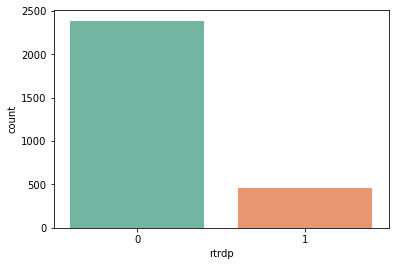

In [77]:
print(ess_de["rtrdp"].value_counts())
sns.countplot(x="rtrdp", data=ess_de, palette="Set2")
plt.show()

In [78]:
econ_var["rtrdp"] = ess_de["rtrdp"]

14 - stfeco

8     671
7     610
5     365
6     355
9     250
4     165
10    139
3     129
2      69
88     33
0      33
1      31
77      2
Name: stfeco, dtype: int64


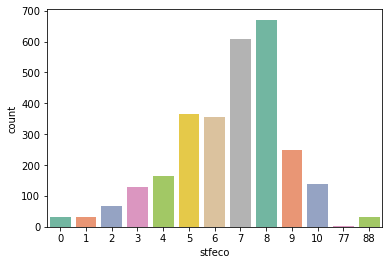

In [79]:
print(ess_de["stfeco"].value_counts())
sns.countplot(x="stfeco", data=ess_de, palette="Set2")
plt.show()

In [80]:
ess_de['stfeco'] = ess_de['stfeco'].replace([1,2,3,4], 0)
ess_de['stfeco'] = ess_de['stfeco'].replace([6,7,8,9,10], 1)
ess_de['stfeco'] = ess_de['stfeco'].replace([77,88], 5)

1    2292
0     560
Name: stfeco, dtype: int64


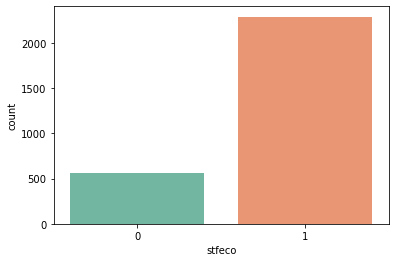

In [91]:
print(ess_de["stfeco"].value_counts())
sns.countplot(x="stfeco", data=ess_de, palette="Set2")
plt.show()

In [90]:
num_fives = (ess_de['stfeco'] == 5).sum()

# calculate the number of 5 values to replace with 0 and 1
num_replace_zero = num_fives // 2
num_replace_one = num_fives - num_replace_zero

# get the indices of the 5 values to replace
replace_indices_zero = np.random.choice(ess_de[ess_de['stfeco'] == 5].index, num_replace_zero, replace=False)
replace_indices_one = np.random.choice(ess_de[ess_de['stfeco'] == 5].index, num_replace_one, replace=False)

# replace the 5 values with 0 and 1
ess_de.loc[replace_indices_zero, 'stfeco'] = 0
ess_de.loc[replace_indices_one, 'stfeco'] = 1

In [92]:
econ_var["stfeco"] = ess_de["stfeco"]

15 - emplrel

1    2363
2     297
6     140
3      52
Name: emplrel, dtype: int64


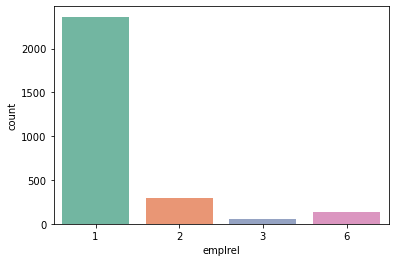

In [99]:
print(ess_de["emplrel"].value_counts())
sns.countplot(x="emplrel", data=ess_de, palette="Set2")
plt.show()

In [94]:
ess_de['emplrel'] = ess_de['emplrel'].replace([7], 1)v
ess_de['emplrel'] = ess_de['emplrel'].replace([8], 2)

In [96]:
econ_var["emplrel"] = ess_de["emplrel"]

16 - hincsrca

1     1734
4      699
2      199
5       81
6       50
8       32
7       24
77      12
88      11
3       10
Name: hincsrca, dtype: int64


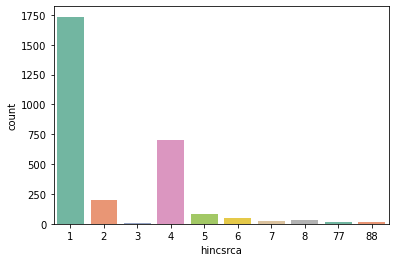

In [97]:
print(ess_de["hincsrca"].value_counts())
sns.countplot(x="hincsrca", data=ess_de, palette="Set2")
plt.show()

In [100]:
ess_de['hincsrca'] = ess_de['hincsrca'].replace([77,88], ess_de['hincsrca'].median())

In [101]:
econ_var["hincsrca"] = ess_de["hincsrca"]

17 - hinctnta

8     327
7     293
9     279
10    273
4     271
5     255
6     237
3     218
1     202
77    201
2     192
88    104
Name: hinctnta, dtype: int64


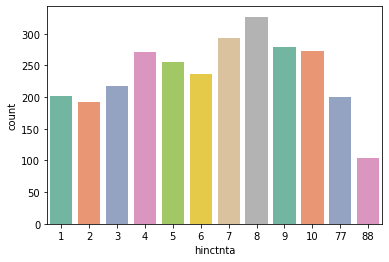

In [103]:
print(ess_de["hinctnta"].value_counts())
sns.countplot(x="hinctnta", data=ess_de, palette="Set2")
plt.show()

In [104]:
ess_de['hinctnta'] = ess_de['hinctnta'].replace([77,88], ess_de['hinctnta'].median())

In [105]:
econ_var["hinctnta"] = ess_de["hinctnta"]

17 - lknemny

1    1429
2    1073
3     230
4      99
8      18
7       3
Name: lknemny, dtype: int64


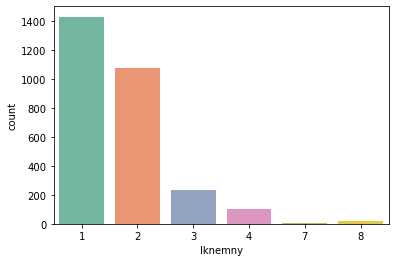

In [106]:
print(ess_de["lknemny"].value_counts())
sns.countplot(x="lknemny", data=ess_de, palette="Set2")
plt.show()

In [107]:
ess_de['lknemny'] = ess_de['lknemny'].replace([1,2], 0)
ess_de['lknemny'] = ess_de['lknemny'].replace([3,4], 1)
ess_de['lknemny'] = ess_de['lknemny'].replace([7,8], ess_de['lknemny'].median())

0    2523
1     329
Name: lknemny, dtype: int64


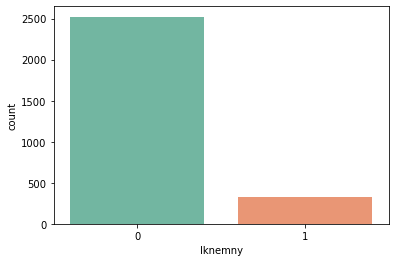

In [108]:
print(ess_de["lknemny"].value_counts())
sns.countplot(x="lknemny", data=ess_de, palette="Set2")
plt.show()

In [109]:
econ_var["lknemny"] = ess_de["lknemny"]

In [110]:
econ_var.to_csv('econ_var.csv', index=False)